#  **Plant Health Monitoring - Data visualization**

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor\\jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

Visualizing Outliers in Cleaned Data 

In [5]:
# Set paths
raw_path = "data/raw/plant_moniter_health_data.csv"
cleaned_path = "data/cleaned/plant_moniter_health_data_cleaned.csv"

# Load cleaned dataframe
df_cleaned = pd.read_csv(cleaned_path)

# Quick check
df_cleaned.head()

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1


8


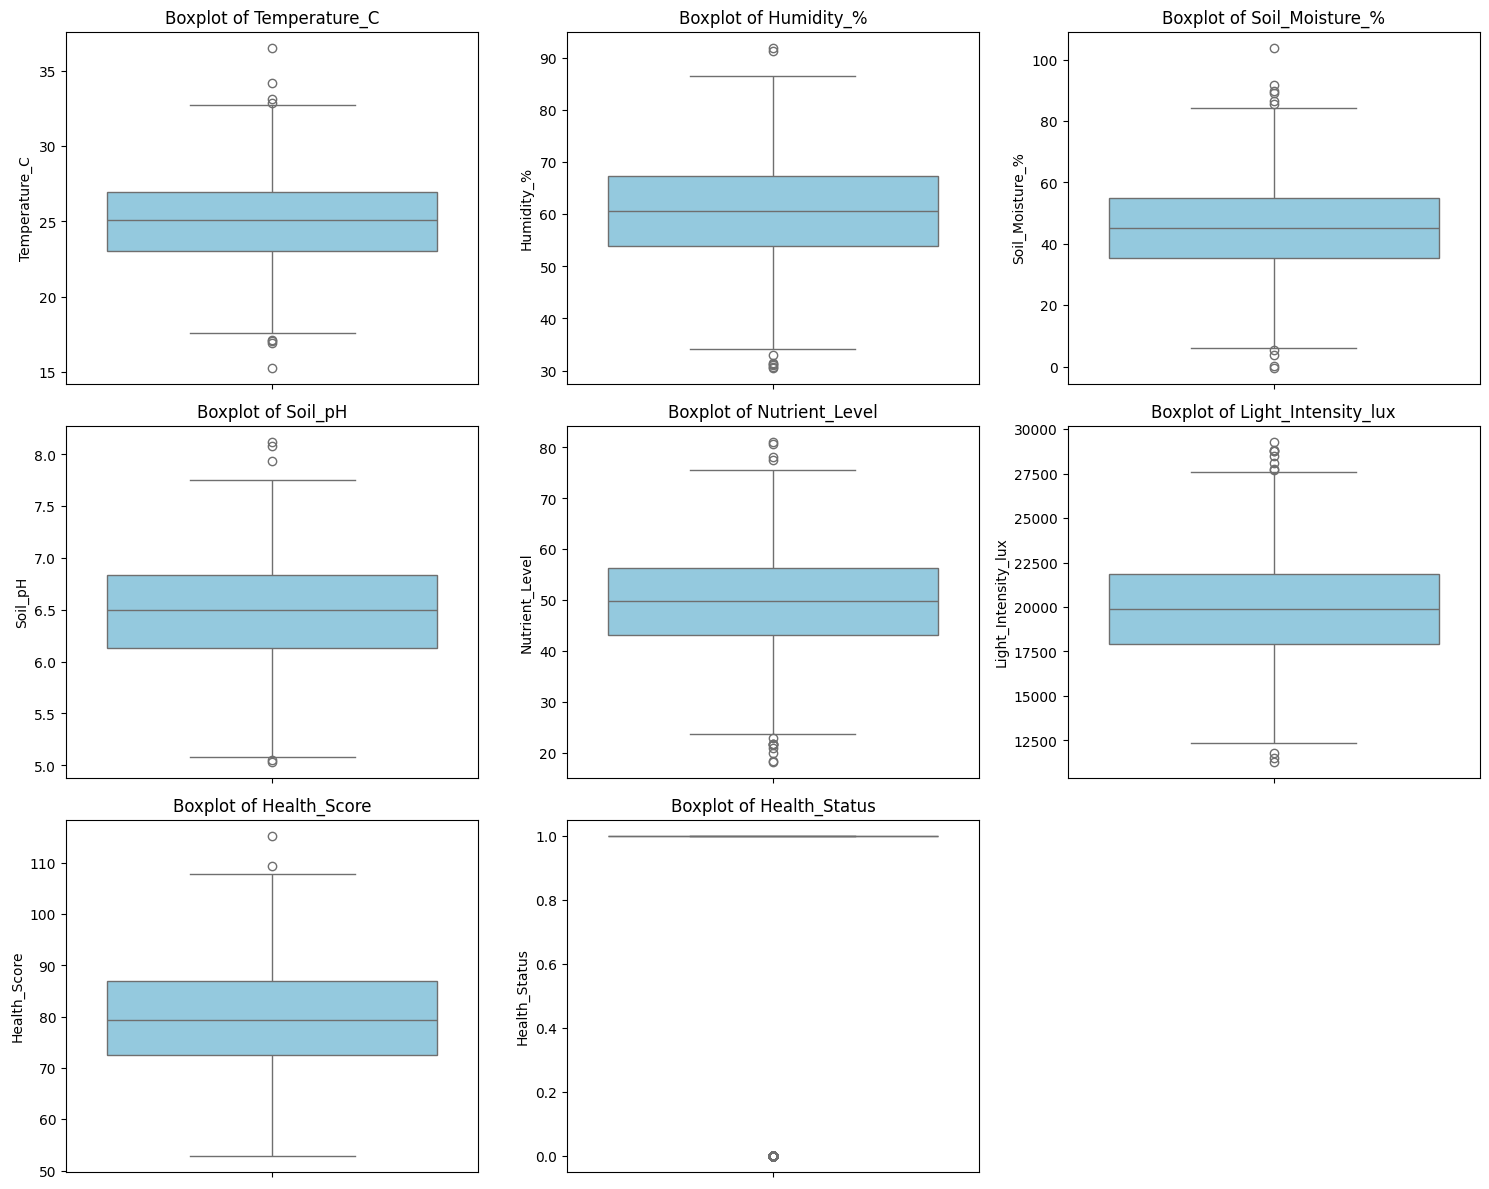

In [6]:
numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()

cols_per_row = 3
num_plots = len(numeric_cols)  # 9/3
print(num_plots)
rows = math.ceil(num_plots / cols_per_row)  # use ceil to round up

# Create subplots
## creates a grid of empty subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))

axes = axes.flatten()  # Flatten to easily index axes

# Plot each boxplot
for i, col in enumerate(numeric_cols):  # gives us index i and col name col
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Turn off unused subplots, in this case, 9 plots for 7 vars: removes 2 extra
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # prevents labesl from overlapping
plt.show()

# Level 1: Binary Stress Scores

Section 1 content

To see how many plants have each total stress level

In [7]:
df_cleaned.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status'],
      dtype='object')

In [8]:
df_cleaned["Soil_Moisture"] = df_cleaned["Soil_Moisture_%"] / 100.0  # now in 0.0 - 1.0 format
df_cleaned["Soil_Moisture"]

0      0.348723
1      0.428322
2      0.331137
3      0.403806
4      0.165958
         ...   
995    0.461622
996    0.488663
997    0.263736
998    0.500126
999    0.426711
Name: Soil_Moisture, Length: 1000, dtype: float64

In [9]:
def moisture_stress(moisture):
    return 1 if moisture < 0.3 or moisture > 0.7 else 0

def ph_stress(ph):
    return 1 if ph < 6.0 or ph > 7.0 else 0

def light_stress(light):
    return 1 if light < 12000 or light > 25000 else 0

def nutrient_stress(n):
    return 1 if n < 30 else 0

df_cleaned["Moisture_Stress"] = df_cleaned["Soil_Moisture"].apply(moisture_stress)
df_cleaned["pH_Stress"] = df_cleaned["Soil_pH"].apply(ph_stress)
df_cleaned["Light_Stress"] = df_cleaned["Light_Intensity_lux"].apply(light_stress)
df_cleaned["Nutrient_Stress"] = df_cleaned["Nutrient_Level"].apply(nutrient_stress)

In [12]:
stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

In [13]:
def plot_stress_summary(
    df_cleaned, stress_cols, color="skyblue", title="Plant Count per Stress Type"
):
    """
    Plots a horizontal bar chart of stress counts from the given DataFrame.

    Parameters:
    - df_cleaned: Pandas DataFrame
    - stress_cols: List of column names representing binary stress indicators (0 or 1)
    - color: Color of the bars (default: lightcoral)
    - title: Title of the plot (default: Plant Count per Stress Type)
    """
    # Step 1: Calculate stress counts
    stress_counts = {col: df_cleaned[col].sum() for col in stress_cols}
    print(stress_counts)

    # Step 2: Sort descending
    sorted_stress = dict(
        sorted(stress_counts.items(), key=lambda x: x[1], reverse=True)
    )
    print(sorted_stress)

    # Step 3: Plot
    plt.figure(figsize=(8, 5))
    plt.barh(list(sorted_stress.keys()), list(sorted_stress.values()), color=color)
    plt.xlabel("Number of Plants Under Stress")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Step 4: Annotate bars with values
    for i, (key, value) in enumerate(sorted_stress.items()):
        plt.text(value + 2, i, str(value), va="center")

    plt.tight_layout()
    plt.show()
        

{'Moisture_Stress': 199, 'pH_Stress': 347, 'Light_Stress': 56, 'Nutrient_Stress': 34}
{'pH_Stress': 347, 'Moisture_Stress': 199, 'Light_Stress': 56, 'Nutrient_Stress': 34}


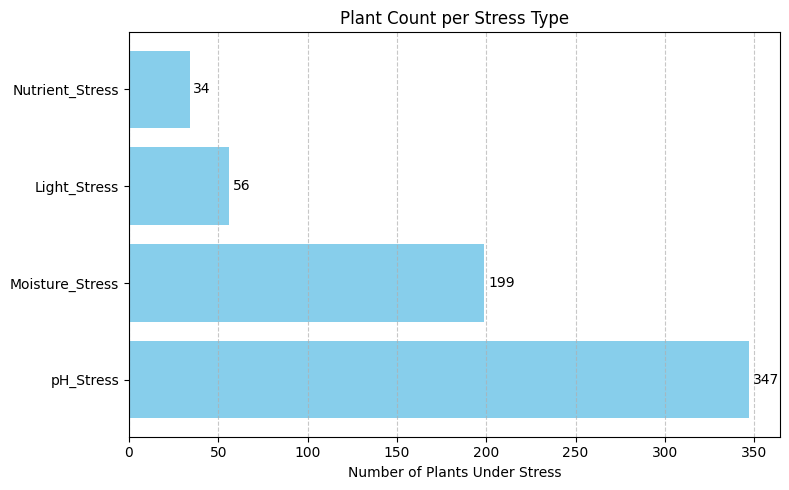

In [14]:
plot_stress_summary(df_cleaned, stress_cols)

In [17]:

df_cleaned["Total_Stress_l1"] = df_cleaned[
    ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]
].sum(axis=1)

df_cleaned["Total_Stress_l1"]

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    0
Name: Total_Stress_l1, Length: 1000, dtype: int64

In [18]:
df_cleaned.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status', 'Soil_Moisture', 'Moisture_Stress', 'pH_Stress',
       'Light_Stress', 'Nutrient_Stress', 'Total_Stress_l1'],
      dtype='object')

Visualize the Distribution of Total stress per plant

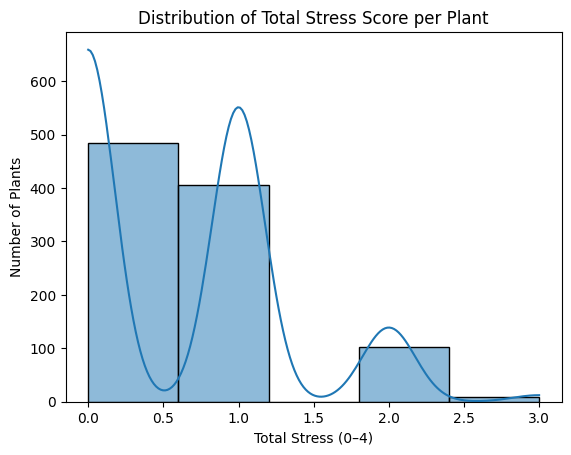

In [19]:
stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

sns.histplot(df_cleaned["Total_Stress_l1"], bins=5, kde=True)
plt.title("Distribution of Total Stress Score per Plant")
plt.xlabel("Total Stress (0–4)")
plt.ylabel("Number of Plants")
plt.show()

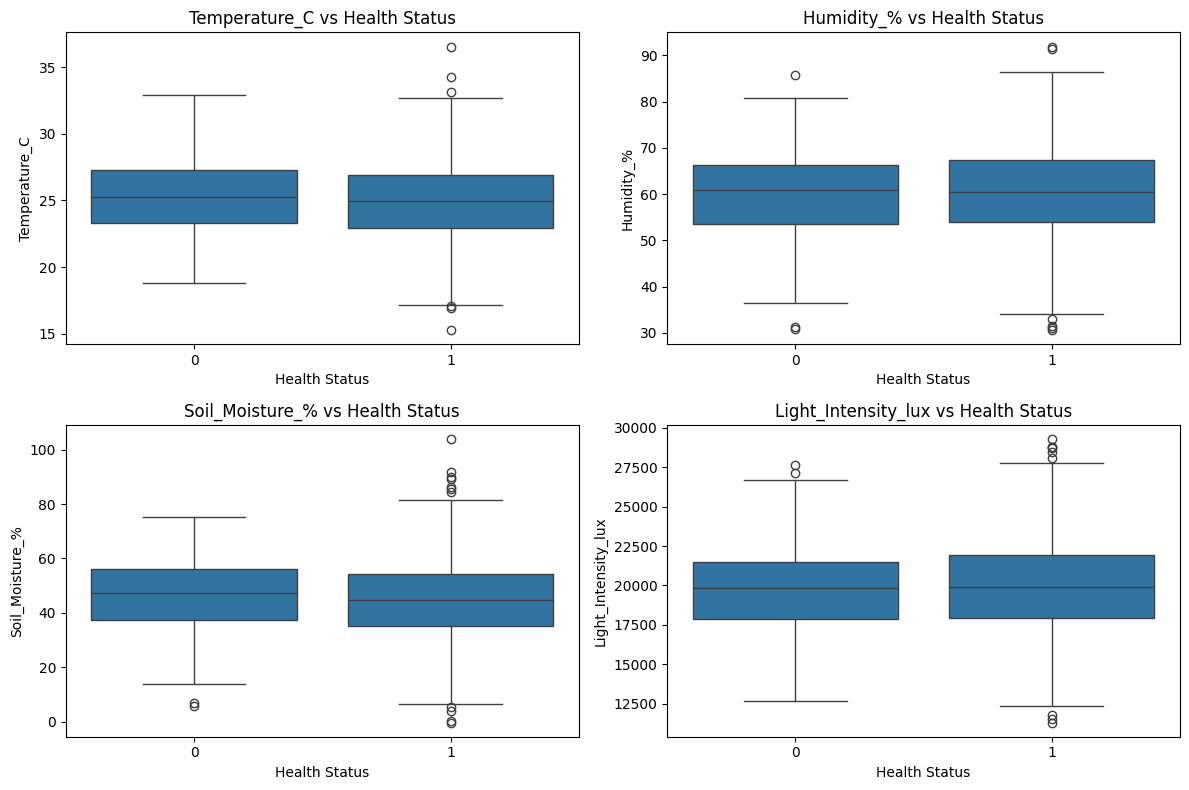

In [21]:
microclimate_vars = ['Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Light_Intensity_lux']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(microclimate_vars):
    sns.boxplot(x='Health_Status', y=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f"{col} vs Health Status")
    axes[i].set_xlabel("Health Status")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

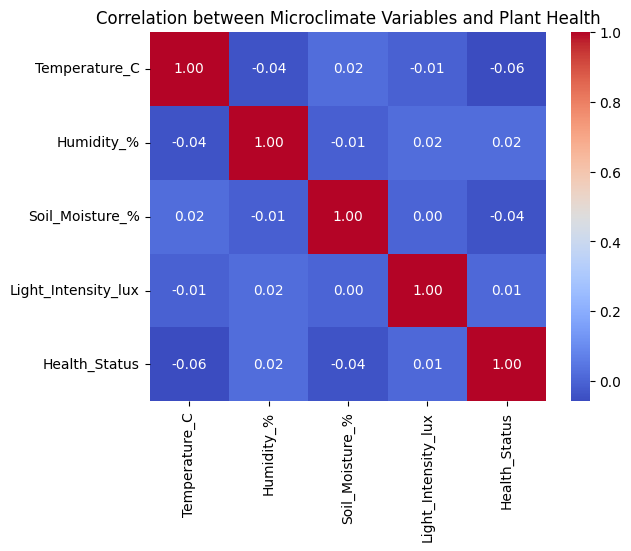

In [22]:
# Create side-by-side boxplots comparing microclimate variables across health status
cols_to_corr = microclimate_vars + ['Health_Status']

sns.heatmap(df_cleaned[cols_to_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Microclimate Variables and Plant Health")
plt.show()

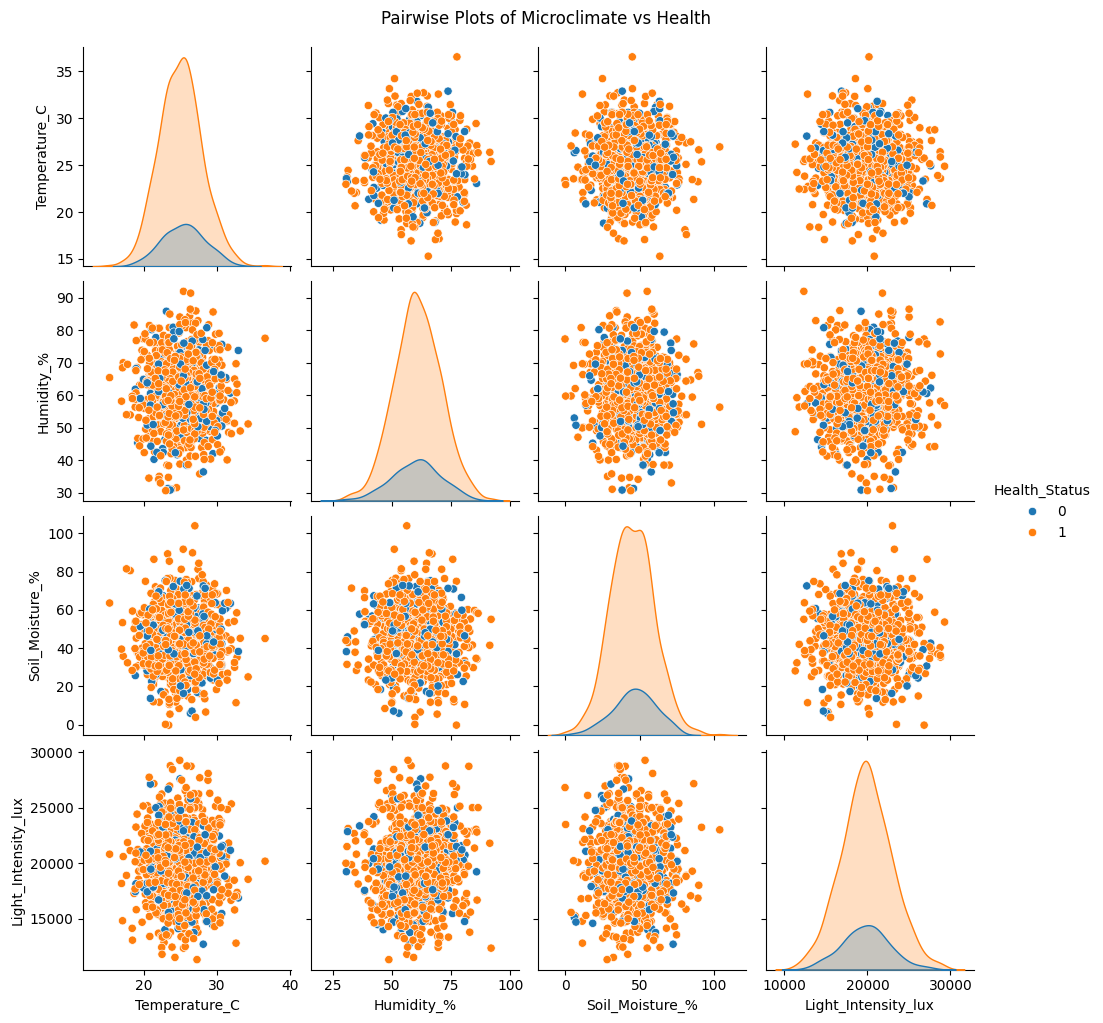

In [23]:
sns.pairplot(df_cleaned, vars=microclimate_vars, hue='Health_Status')
plt.suptitle("Pairwise Plots of Microclimate vs Health", y=1.02)
plt.show()

---

# Level 2: Zoning (Threshold-Based Binning)

Section 2 content

---

# Level 3: Combined Effects, Fingerprints, Interaction Terms

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
